In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Google stock price dataset
data = pd.read_csv('/content/sample_data/Google_Stock_Price_Train.csv')

In [3]:
# Assume 'Close' is the target column for prediction
data = data[["Close"]]
data.dropna(inplace=True)

<ipython-input-3-26756ae1b545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
# Create sequences for time series prediction
def create_sequences(data, sequence_length):
    X, Y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

In [6]:
sequence_length = 60
X, Y = create_sequences(data_scaled, sequence_length)

In [7]:
# Reshape input to be 3D for RNN [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

In [26]:
# Build RNN model
model = keras.Sequential([
    layers.SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.SimpleRNN(50),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0470 - val_loss: 0.0015
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.6882e-04 - val_loss: 0.0013
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.1412e-04 - val_loss: 0.0016
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.0841e-04 - val_loss: 0.0010
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.4501e-04 - val_loss: 8.4378e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.8298e-04 - val_loss: 0.0014
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.6659e-04 - val_loss: 5.2929e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.0955e-04 - val_loss: 6.7421e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.3653e-04 - val_loss: 0.0010
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.9877e-04 - val_loss: 4.4642e-04
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.5112e-04 - val_loss: 3.9038e-04
Epo

In [29]:
# Evaluate model
loss = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013
Test Loss: 0.0018


In [30]:
# Predict
predicted_stock_price = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [31]:
# Inverse transform predictions
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(Y_test.reshape(-1, 1))

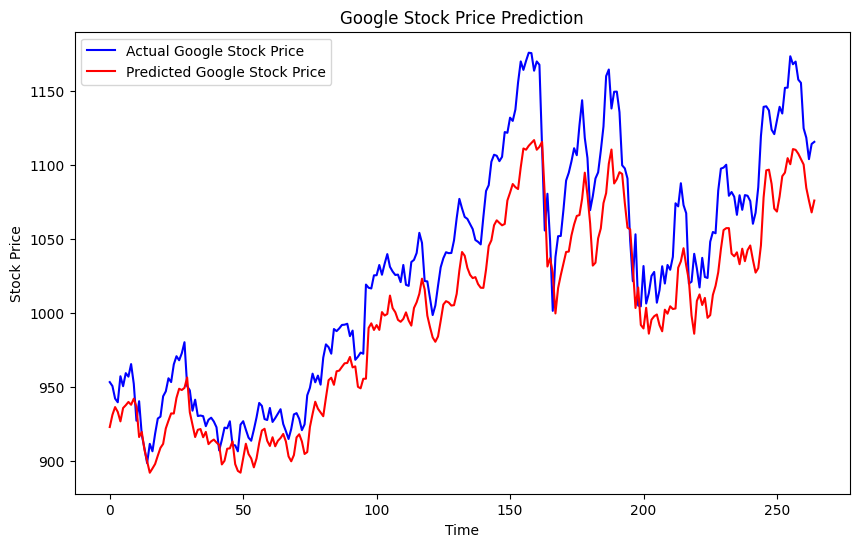

In [32]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y_test_scaled, color='blue', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()